# MACHINE LEARNING PROJECT 20BCE0969

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Customers.csv')

# EDA

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape 

(200, 5)

In [6]:
# statistical analysis 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.dtypes 

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

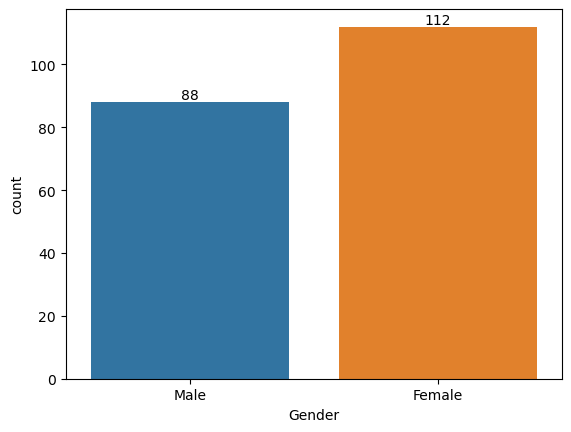

In [10]:
ax = sns.countplot(x='Gender', data=df)
ax.bar_label(container=ax.containers[0],labels = df['Gender'].value_counts(ascending = True))
plt.show()

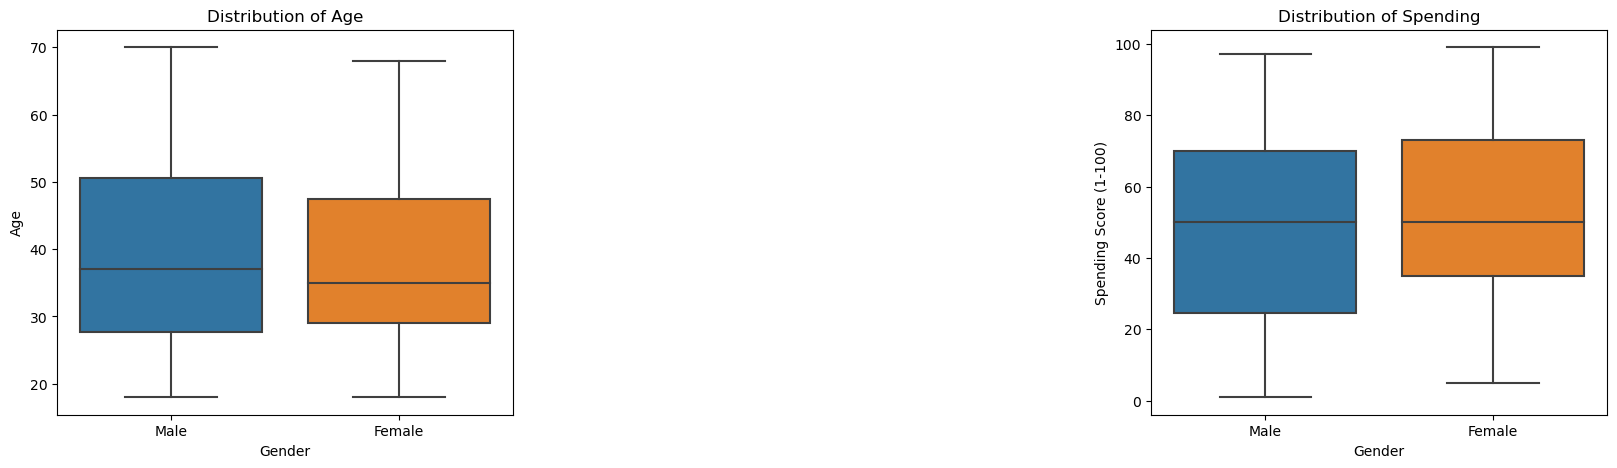

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df.Gender, y=df.Age)
plt.title('Distribution of Age')

plt.subplot(1,3,3)
sns.boxplot(x=df.Gender, y=df['Spending Score (1-100)'])
plt.title('Distribution of Spending')
plt.show()

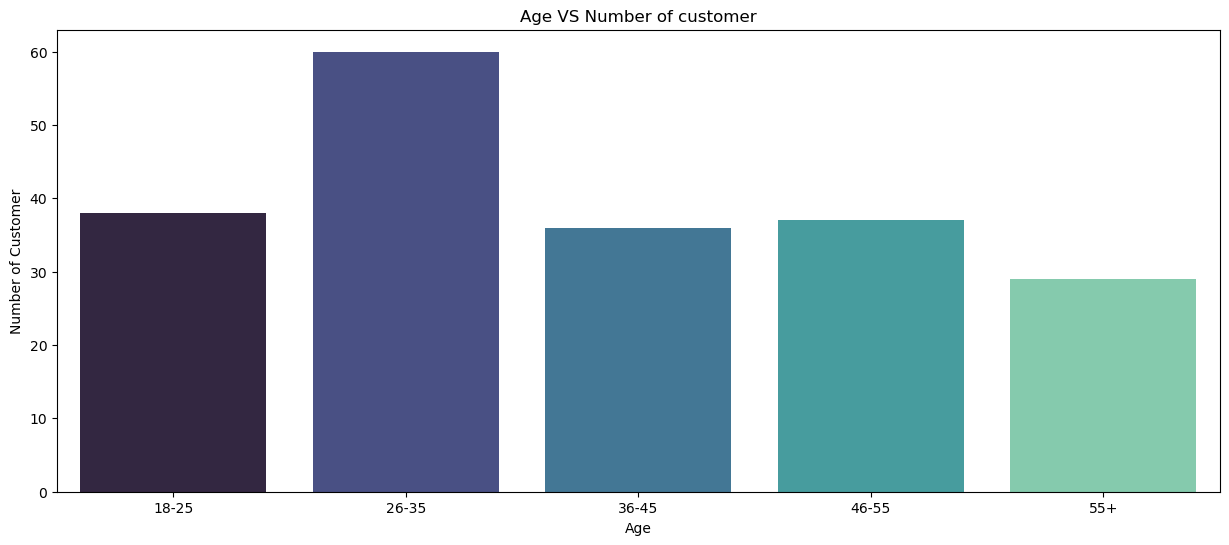

In [12]:
# Creating group of ages:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_above_55 = df.Age[(df.Age >= 56)]

agex = ['18-25', '26-35', '36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex, y = agey , palette='mako')
plt.title('Age VS Number of customer')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

# KMEANS CLUSTERING

In [13]:
x = df.iloc[:,[3,4]].values

In [14]:
wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [15]:
wcss #within-cluster sum of squares (WCSS) 

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.83934915659,
 21850.16528258563,
 19672.07284901432]

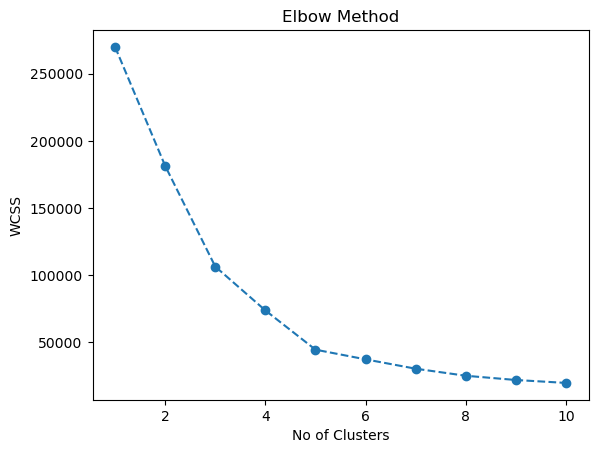

In [16]:
plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y = kmeans.fit_predict(x)


In [18]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [19]:
df['Cluster'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


Cluster 1: Average Income, Average Spending Score
Cluster 2: High Income, Low Spending Score
Cluster 3: Low Income, Low Spending Score
Cluster 4: Low Income, High Spending Score
Cluster 5: High Income, High Spending Score


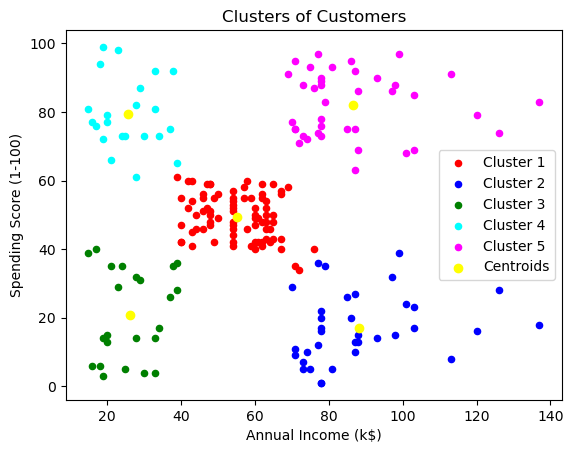

In [20]:
print('Cluster 1: Average Income, Average Spending Score\nCluster 2: High Income, Low Spending Score\nCluster 3: Low Income, Low Spending Score\nCluster 4: Low Income, High Spending Score\nCluster 5: High Income, High Spending Score')

plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
oneData = df.iloc[y == 0, :]
twoData = df.iloc[y == 1, :]
threeData = df.iloc[y == 2, :]
fourData = df.iloc[y == 3, :]
fiveData = df.iloc[y == 4, :]

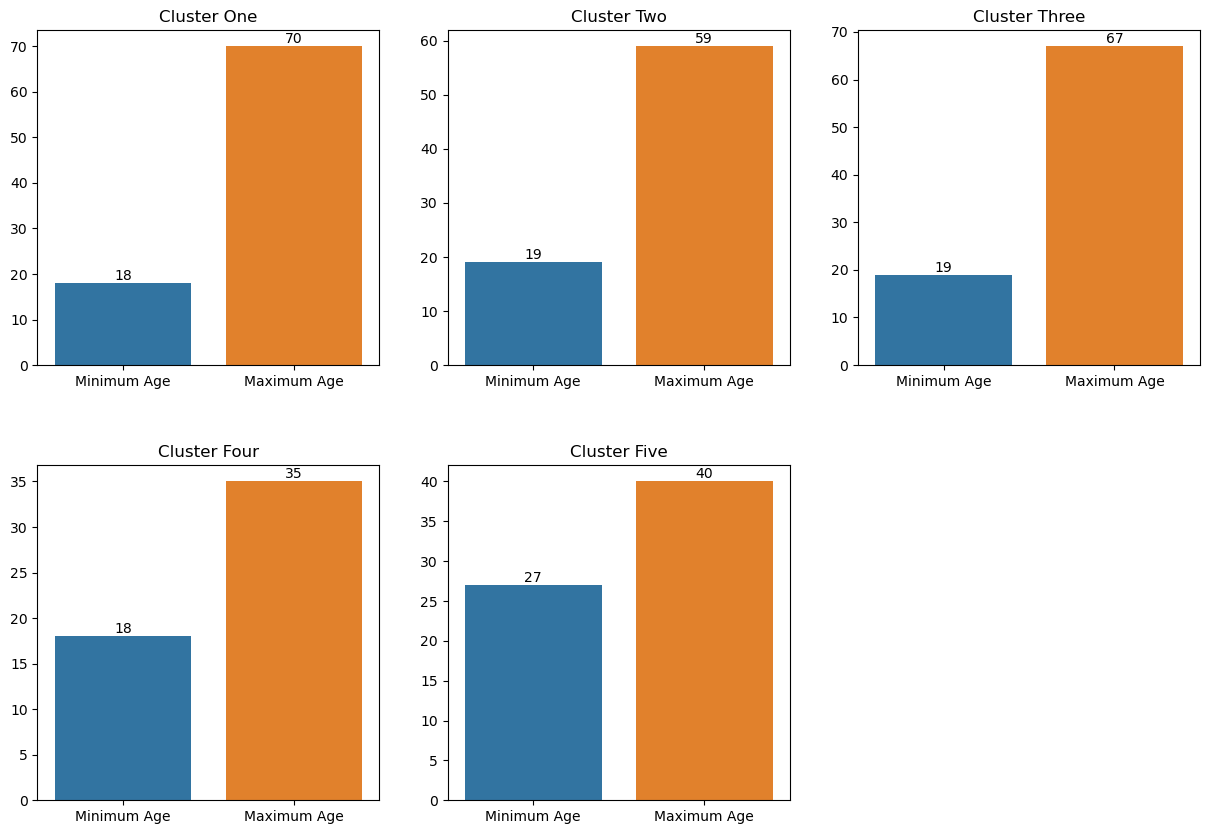

In [22]:

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [oneData['Age'].min(), oneData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [oneData['Age'].min(), oneData['Age'].max()])
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [twoData['Age'].min(), twoData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [twoData['Age'].min(), twoData['Age'].max()])
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [threeData['Age'].min(), threeData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [threeData['Age'].min(), threeData['Age'].max()])
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fourData['Age'].min(), fourData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fourData['Age'].min(), fourData['Age'].max()])
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fiveData['Age'].min(), fiveData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fiveData['Age'].min(), fiveData['Age'].max()])
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

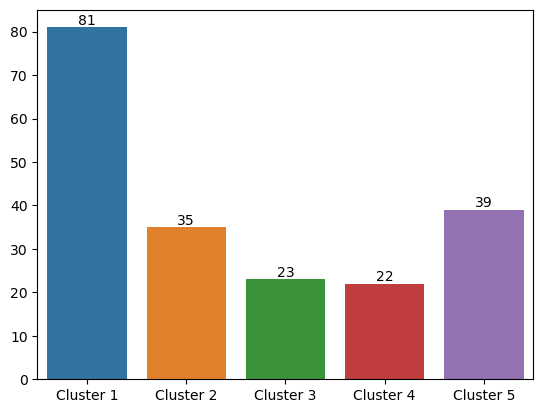

In [23]:
ax = sns.barplot(x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                 y = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
ax.bar_label(container = ax.containers[0],labels = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
plt.show()

# CONCLUSION

In [24]:
print('Cluster 1: Average Income, Average Spending Score\nCluster 2: High Income, Low Spending Score\nCluster 3: Low Income, Low Spending Score\nCluster 4: Low Income, High Spending Score\nCluster 5: High Income, High Spending Score\n')


mul = """
-> Cluster 1 occupies the maximum amount of people that earn decent as well as spend a decent amount. 
They should be sent regular updates and promotional offers so as to keep their interest.

-> Cluster 2 has high income but they do not shop as much. 
These people should be targeted since they have the spending capactiy. 
Their past data should be analysed so as to send them specific promotional messages to get their interest back.

-> Cluster 3 should be ignored since they do not have the spending capacity nor do they show interest in spending.

-> Cluster 4 is a risky group since they do not have the spending capacity yet they have a high spending score. 
They should be sent more discount based coupons.

-> Cluster 5 is the best group since they have a high income and a high spending score as well. 
They should be sent regular updates and promotions."""

print(mul)


Cluster 1: Average Income, Average Spending Score
Cluster 2: High Income, Low Spending Score
Cluster 3: Low Income, Low Spending Score
Cluster 4: Low Income, High Spending Score
Cluster 5: High Income, High Spending Score


-> Cluster 1 occupies the maximum amount of people that earn decent as well as spend a decent amount. 
They should be sent regular updates and promotional offers so as to keep their interest.

-> Cluster 2 has high income but they do not shop as much. 
These people should be targeted since they have the spending capactiy. 
Their past data should be analysed so as to send them specific promotional messages to get their interest back.

-> Cluster 3 should be ignored since they do not have the spending capacity nor do they show interest in spending.

-> Cluster 4 is a risky group since they do not have the spending capacity yet they have a high spending score. 
They should be sent more discount based coupons.

-> Cluster 5 is the best group since they have a high incom